In [32]:
import pandas as pd
import numpy as np

sdat = pd.read_pickle('shades_PMcGVendetta.pkl')
sdat[['name','swa lab_diff','art lab_diff','nat lab_diff']]

,name,swa lab_diff,art lab_diff,nat lab_diff
0,PMcG_Vendetta,0.000000,0.000000,0.000000
1,CP_LiquidCourage,5.856970,1.241058,8.069249
2,Seph_AfterHours,9.758263,13.450380,3.864110
3,Tarte_Sandals,7.474148,2.384674,6.108861
4,TF_Dominic,4.949486,12.338280,15.317171
5,KVD_Outlaw,17.503976,15.631720,12.792470
6,Burb_MilitaryRed,9.783101,16.359385,15.076986
7,PMcG_Sedition,0.685070,1.311148,1.786325
8,MAC_SuchFlare,4.373606,16.572650,0.000000
9,NYX_PerfectRed,21.576023,22.388236,18.915905


<IPython.core.display.Javascript object>


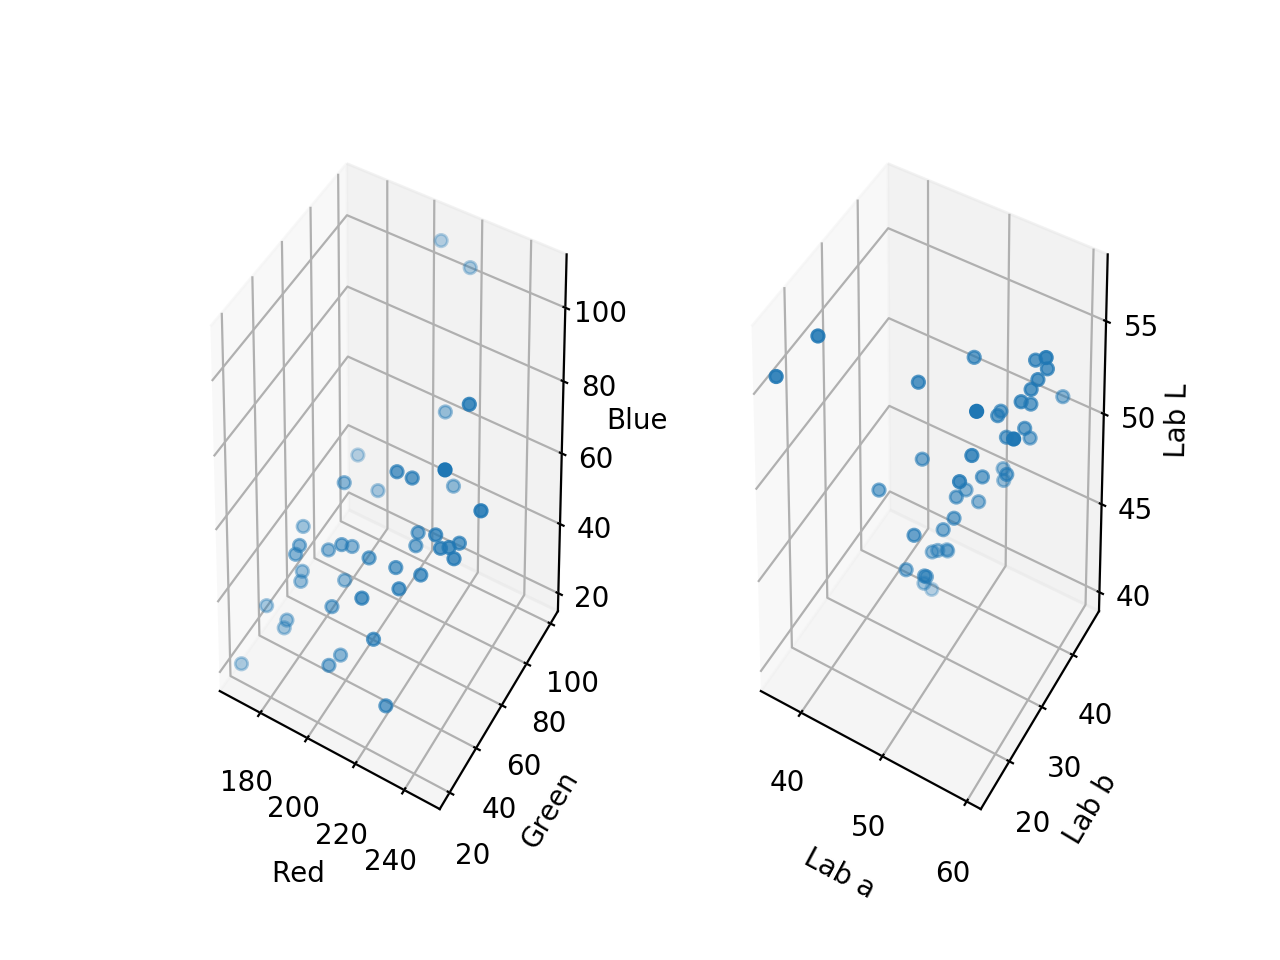

In [25]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as py
import mpld3

%matplotlib notebook

fig1 = py.figure()
ax1 = fig1.add_subplot(121,projection='3d')

ax1.scatter(sdat['swa r_rgb'],sdat['swa g_rgb'],sdat['swa b_rgb'])
ax1.set_xlabel('Red')
ax1.set_ylabel('Green')
ax1.set_zlabel('Blue')

#labels = ['point {0}'.format(i + 1) for i in range(42)]
#tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)#sdat['name'].values.tolist())
#mpld3.plugins.connect(fig, tooltip)

ax2 = fig1.add_subplot(122,projection='3d')
ax2.scatter(sdat['swa a_lab'],sdat['swa b_lab'],sdat['swa l_lab'])
ax2.set_xlabel('Lab a')
ax2.set_ylabel('Lab b')
ax2.set_zlabel('Lab L')
py.show()

# various shades represented in RGB space and CIE (International Commission on Illumination) Lab space

In [27]:
from plotly import tools
import plotly.plotly as ply
import plotly.graph_objs as go

rgb_colors = sdat[['swa r_rgb','swa g_rgb','swa b_rgb']].values
colors = ['rgb('+str(int(rgb_colors[i,0]))+','+str(int(rgb_colors[i,1]))+','+str(int(rgb_colors[i,2]))+')' for i in range(rgb_colors.shape[0])]

trace1 = go.Scatter3d(x=sdat['swa a_lab'].values,y=sdat['swa b_lab'].values,z=sdat['swa l_lab'].values,mode='markers',
                      text=sdat['name'].values,marker=dict(color=colors))

layout1 = go.Layout(scene = dict(xaxis = dict(title='Lab a*'),yaxis = dict(title='Lab b*'),zaxis = dict(title='Lab L*'),),
                    width=700,margin=dict(r=20, b=10,l=10, t=10))
fig1 = go.Figure(data=[trace1],layout=layout1)

ply.iplot(fig1,filename='LabColor_scatter')

# Shades that are considered (according to Temptalia database) matches for Pat McGrath's Vendetta lipstick (and 
# including Pat McGrath's Vendetta lipstick) are shown in CIE  (International Commission on Illumination) Lab space.
# The color of each point shows its corresponding perceived (by the human eye) color for reference.

# CIE Lab (or Lab for short) space is designed to match the perceptual experience of the human eye.
# Increasing and decreasing Lab 'a*' values demonstrate more magenta and green colors respectively, increasing and decreasing
# Lab 'b*' values more yellow and blue colors respectively, and increasing and decreasing Lab 'L*' values demonstrate lighter
# and darker shades (i.e. shades with more white and black) respectively.
# CIE Lab space is also designed to be perceptually uniform in regards to human vision, distances of approximately 
# equal magnitude in Lab space correspond to approximately equal difference in color as perceived by the human eye, 
# unlike RGB color space.



In [29]:
trace2 = go.Scatter(y=sdat['percent'].values,x=sdat['swa lab_diff'].values,mode='markers',text=sdat['name'].values,
                   name='Arm Swatch')
trace3 = go.Scatter(y=sdat['percent'].values,x=sdat['art lab_diff'].values,mode='markers',text=sdat['name'].values,
                   name='Lip Swatch - Artificial Light')
trace4 = go.Scatter(y=sdat['percent'].values,x=sdat['nat lab_diff'].values,mode='markers',text=sdat['name'].values,
                   name='Lip Swatch - Natural Light')

layout2= go.Layout(yaxis= dict(title= 'Percent Similar (Temptalia)'),xaxis=dict(title= 'CIE Lab Absolute Difference'))

fig2 = go.Figure(data=[trace2,trace3,trace4],layout=layout2)

ply.iplot(fig2,filename='percent_LabDiff_scatter')

In [34]:
rgb_colors = sdat[['swa r_rgb','swa g_rgb','swa b_rgb']].values
colors = ['rgb('+str(int(rgb_colors[i,0]))+','+str(int(rgb_colors[i,1]))+','+str(int(rgb_colors[i,2]))+')' for i in range(rgb_colors.shape[0])]

trace5 = go.Scatter3d(x=sdat['swa r_rgb'].values,y=sdat['swa g_rgb'].values,z=sdat['swa b_rgb'].values,mode='markers',
                      text=sdat['name'].values,marker=dict(color=colors))

layout3 = go.Layout(scene = dict(xaxis = dict(title='Red'),yaxis = dict(title='Blue'),zaxis = dict(title='Green'),),
                    width=700,margin=dict(r=20, b=10,l=10, t=10))
fig3 = go.Figure(data=[trace5],layout=layout3)

ply.iplot(fig3,filename='RGBColor_scatter')